In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from math import sqrt
from math import log2
import time
%matplotlib inline

# load different classifieres
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RFC


from sklearn.model_selection import train_test_split

# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# preprocessing 
from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

# for selection the right path
import os,sys,inspect,pathlib
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

import functions

from common import misc
from common.data_parser import *
from common.model_trainer_alex import *
from common.misc import *
from config import *

In [2]:
module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/voting', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.358541065/pythonFiles', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.358541065/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/alexander/.local/lib/python3.7/site-packages/IPython/extensions', '/home/alexander/.ipython']


In [3]:
datapath_train = get_data_path("Congressional_Voting", "CongressionalVotingID.shuf.lrn.csv")
display(datapath_train)
datapath_test = get_data_path("Congressional_Voting", "CongressionalVotingID.shuf.tes.csv")
display(datapath_test)
datapath_examp = get_data_path("Congressional_Voting", "CongressionalVotingID.shuf.sol.ex.csv")
display(datapath_test)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Congressional_Voting/CongressionalVotingID.shuf.lrn.csv')

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Congressional_Voting/CongressionalVotingID.shuf.tes.csv')

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Congressional_Voting/CongressionalVotingID.shuf.tes.csv')

# Data exploration
Data consinst out of of class for the classification and the instances are mostly "y,n,unknown".

In [4]:
df_train = pd.read_csv(datapath_train).drop("ID",axis = 1)
df_test = pd.read_csv(datapath_test).drop("ID",axis = 1)

df_train = df_train.rename(columns={"class": "Class"})
df_train

,Class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,democrat,y,n,y,n,n,n,unknown,y,y,unknown,n,n,n,n,y,unknown
1,democrat,y,y,y,n,n,n,y,y,unknown,n,y,n,n,n,y,unknown
2,democrat,unknown,unknown,unknown,n,n,n,y,y,y,y,n,n,y,n,y,y
3,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
4,democrat,n,y,y,n,n,n,y,y,y,y,n,n,n,n,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,democrat,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,unknown
214,republican,n,n,n,y,y,y,n,n,n,n,n,y,y,y,y,n
215,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
216,republican,y,n,y,y,y,y,y,y,n,y,y,y,n,y,y,y


In [5]:
num_samples, num_features = df_train.shape
num_features -= 2 # class and id aren't features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Class                                   218 non-null    object
 1   handicapped-infants                     218 non-null    object
 2   water-project-cost-sharing              218 non-null    object
 3   adoption-of-the-budget-resolution       218 non-null    object
 4   physician-fee-freeze                    218 non-null    object
 5   el-salvador-aid                         218 non-null    object
 6   religious-groups-in-schools             218 non-null    object
 7   anti-satellite-test-ban                 218 non-null    object
 8   aid-to-nicaraguan-contras               218 non-null    object
 9   mx-missile                              218 non-null    object
 10  immigration                             218 non-null    object
 11  synfue

In [6]:
# Count occurence of M/B
count_classes = df_train["Class"].value_counts()
count_classes

democrat      135
republican     83
Name: Class, dtype: int64

In [7]:
dist_classes = count_classes.apply(lambda x: x/num_samples)
dist_classes

democrat      0.619266
republican    0.380734
Name: Class, dtype: float64

## Features:

n... no

y... yes

unknown

We will later also use the mapping/encoding:

$unknown \rightarrow 0$

$n \rightarrow -1$

$y \rightarrow 1$

# Data preparation

In [8]:
df_train = df_train.replace("n",-1)
df_train = df_train.replace("y",1)
df_train = df_train.replace("unknown",0)


df_test = df_test.replace("n",-1)
df_test = df_test.replace("y",1)
df_test = df_test.replace("unknown",0)

In [9]:
# Colors
sns_cols = sns.color_palette()
snsblue, snsgreen = sns_cols[0], sns_cols[1]

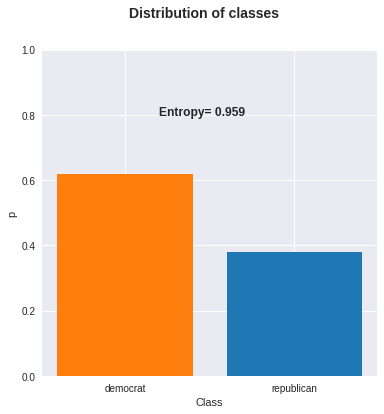

In [10]:
plt.rcParams.update({'font.size': 12})
mpl.style.use('seaborn')
fig = plt.figure(figsize=(6,6))
plt.bar(dist_classes.index, dist_classes, color=[snsgreen, snsblue])
plt.suptitle("Distribution of classes", fontsize=14, weight="bold")
plt.ylim((0,1))
plt.ylabel("p")
plt.xlabel("Class")

entropy = -sum([p*log2(p) for p in dist_classes])
plt.annotate(f"Entropy= {entropy:.3f}", (0.2, 0.8), fontweight="bold")

plt.savefig("class_dist.png")

In [ ]:
corr_to_class_stripped = functions.plot_corr_heatmap(df_train, ticksfont=16,abs = False)

In [ ]:
red_corr_list = functions.Red_corr_list(corr_to_class_stripped,0.4)
red_corr_list

In [ ]:
df_train_red = df_train.drop(red_corr_list,axis = 1)

In [ ]:
corr_to_class_stripped = functions.plot_corr_heatmap(df_train_red, ticksfont=16)

In [ ]:
df_train = df_train_red

In [ ]:
red_list = list(df_train_red)
red_list[-1]

In [ ]:
red_list = list(df_train_red)
X_lrn = df_train.loc[:,red_list[1]:red_list[-1]]
Y_lrn = df_train.loc[:,"Class":"Class"]
df_test = df_test.loc[:,red_list[1]:red_list[-1]]

In [ ]:
df_test

In [ ]:
df_train

In [ ]:
X_lrn = df_train.loc[:,"Class":]
Y_lrn = df_train.loc[:,"Class":"Class"]

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_lrn, Y_lrn, test_size=0.4) #random noch einfügen

In [ ]:
#scaler = StandardScaler()  
#scaler.fit(X_train) 
#X_train = scaler.transform(X_train) 
#X_valid = scaler.transform(X_valid)  

# Training

In [17]:
#X_lrn = df_train.loc[:,"handicapped-infants":]
X_lrn = df_train.loc[:,"handicapped-infants":]
Y_lrn = df_train.loc[:,"Class":"Class"]
#df_test = df_test.loc[:,red_list[1]:red_list[-1]]

In [18]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_lrn, Y_lrn, test_size=0.4) #random noch einfügen

In [19]:
X_train

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
8,-1,-1,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,1
44,1,1,1,-1,1,1,-1,-1,0,1,-1,-1,-1,1,1,0
5,1,-1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1
49,1,-1,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,0
186,1,1,1,-1,-1,-1,1,1,1,-1,1,-1,-1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-1,0,-1,1,1,1,-1,-1,-1,1,-1,1,1,1,-1,1
205,-1,-1,1,-1,-1,1,1,1,1,1,-1,1,-1,1,1,0
159,-1,-1,1,-1,-1,1,1,1,1,1,-1,1,-1,-1,-1,1
25,0,-1,1,1,-1,1,1,1,1,1,-1,1,-1,1,-1,1


# Grid-search

In [20]:
# MLP
params = {
    "alpha" : [1e-2,1e-1], 
    "hidden_layer_sizes" : [(10,10,10),(30,30,30),(50,50,50),(100,100,100),(200,200,200)],
    "solver" : ["adam","lbfgs"],
    "activation" : ["tanh", "relu"]
    }


modeltrainer = ModelTrainer(MLP, params, X_train, Y_train, X_valid, Y_valid, accuracy_score, thread_cnt=4)
modeltrainer.cm_setup(["democrat", "republican"])
modeltrainer.train()
modeltrainer.save_result("out/voting_mlp.csv")

cms = modeltrainer.cms
df_results_MLP = modeltrainer.result

Finished evaluation
Best parameteters found with: {'alpha': 0.01, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam', 'activation': 'tanh', 'f1_score': 0.9879501574695331, 'recall': 0.990909090909091, 'precision': 0.9852941176470589, 'id': 12}
score= 0.9886363636363636
Total evaluation time = 23.25s


In [21]:
df_results_MLP = pd.read_csv("out/voting_mlp.csv")

In [22]:
df_results_MLP

,alpha,hidden_layer_sizes,solver,activation,score,f1_score,recall,precision,id
0,0.01,"(10, 10, 10)",adam,tanh,0.954545,0.952070,0.957576,0.947709,0
1,0.01,"(10, 10, 10)",adam,relu,0.965909,0.963410,0.960606,0.966518,1
2,0.01,"(10, 10, 10)",lbfgs,tanh,0.977273,0.975758,0.975758,0.975758,2
3,0.01,"(10, 10, 10)",lbfgs,relu,0.977273,0.975758,0.975758,0.975758,3
4,0.01,"(30, 30, 30)",adam,tanh,0.954545,0.950893,0.945455,0.957555,4
5,0.01,"(30, 30, 30)",adam,relu,0.977273,0.975758,0.975758,0.975758,5
6,0.01,"(30, 30, 30)",lbfgs,tanh,0.965909,0.963410,0.960606,0.966518,6
7,0.01,"(30, 30, 30)",lbfgs,relu,0.977273,0.975758,0.975758,0.975758,7
8,0.01,"(50, 50, 50)",adam,tanh,0.977273,0.975758,0.975758,0.975758,8
9,0.01,"(50, 50, 50)",adam,relu,0.977273,0.975758,0.975758,0.975758,9


In [35]:
best_params_MLP = functions.FindBest_Params(df_results_MLP)
best_params_MLP

,alpha,hidden_layer_sizes,solver,activation,score,f1_score,recall,precision,id
12,0.01,"(100, 100, 100)",adam,tanh,0.988636,0.98795,0.990909,0.985294,12
13,0.01,"(100, 100, 100)",adam,relu,0.988636,0.98795,0.990909,0.985294,13
16,0.01,"(200, 200, 200)",adam,tanh,0.988636,0.98795,0.990909,0.985294,16
20,0.10,"(10, 10, 10)",adam,tanh,0.988636,0.98795,0.990909,0.985294,20
28,0.10,"(50, 50, 50)",adam,tanh,0.988636,0.98795,0.990909,0.985294,28
29,0.10,"(50, 50, 50)",adam,relu,0.988636,0.98795,0.990909,0.985294,29


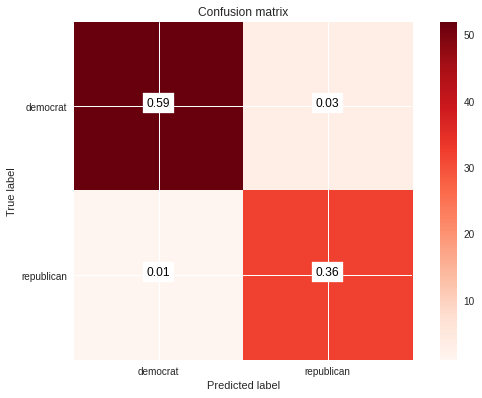

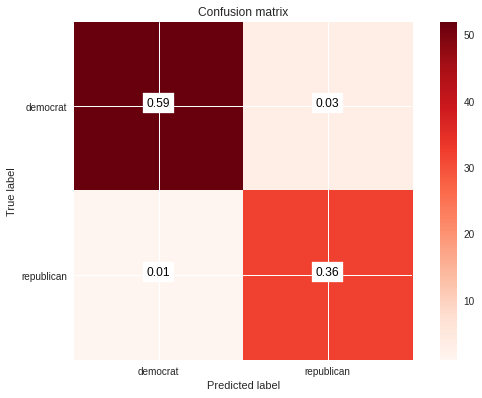

In [23]:
plot_confusion_matrix(cms[0][1], ["democrat", "republican"], normalize=True, title="Confusion matrix", cmap=plt.cm.Reds)

In [24]:
# RFC
params = {
    "n_estimators": [1, 10, 20, 100, 200, 500, 1000],
    "criterion": ["gini", "entropy"],
    "max_features": ["sqrt", "log2"]
}


modeltrainer = ModelTrainer(RFC, params, X_train, Y_train, X_valid, Y_valid, accuracy_score, thread_cnt=4)
modeltrainer.cm_setup(["democrat", "republican"])
modeltrainer.train()
modeltrainer.save_result("out/voting_rf.csv")

cms = modeltrainer.cms
df_results_RFC = modeltrainer.result

Finished evaluation
Best parameteters found with: {'n_estimators': 10, 'criterion': 'entropy', 'max_features': 'sqrt', 'f1_score': 0.9879501574695331, 'recall': 0.990909090909091, 'precision': 0.9852941176470589, 'id': 6}
score= 0.9886363636363636
Total evaluation time = 6.47s


In [25]:
df_results_RFC = pd.read_csv("out/voting_rf.csv")
df_results_RFC

,n_estimators,criterion,max_features,score,f1_score,recall,precision,id
0,1,gini,sqrt,0.977273,0.976035,0.981818,0.971429,0
1,1,gini,log2,0.977273,0.975758,0.975758,0.975758,1
2,1,entropy,sqrt,0.977273,0.976035,0.981818,0.971429,2
3,1,entropy,log2,0.977273,0.975758,0.975758,0.975758,3
4,10,gini,sqrt,0.977273,0.976035,0.981818,0.971429,4
5,10,gini,log2,0.977273,0.976035,0.981818,0.971429,5
6,10,entropy,sqrt,0.988636,0.987950,0.990909,0.985294,6
7,10,entropy,log2,0.977273,0.976035,0.981818,0.971429,7
8,20,gini,sqrt,0.977273,0.976035,0.981818,0.971429,8
9,20,gini,log2,0.988636,0.987950,0.990909,0.985294,9


In [26]:
best_params_RFC = functions.FindBest_Params(df_results_RFC)
best_params_RFC

,n_estimators,criterion,max_features,score,f1_score,recall,precision,id
6,10,entropy,sqrt,0.988636,0.98795,0.990909,0.985294,6
9,20,gini,log2,0.988636,0.98795,0.990909,0.985294,9
11,20,entropy,log2,0.988636,0.98795,0.990909,0.985294,11
12,100,gini,sqrt,0.988636,0.98795,0.990909,0.985294,12
14,100,entropy,sqrt,0.988636,0.98795,0.990909,0.985294,14
16,200,gini,sqrt,0.988636,0.98795,0.990909,0.985294,16
17,200,gini,log2,0.988636,0.98795,0.990909,0.985294,17
19,200,entropy,log2,0.988636,0.98795,0.990909,0.985294,19


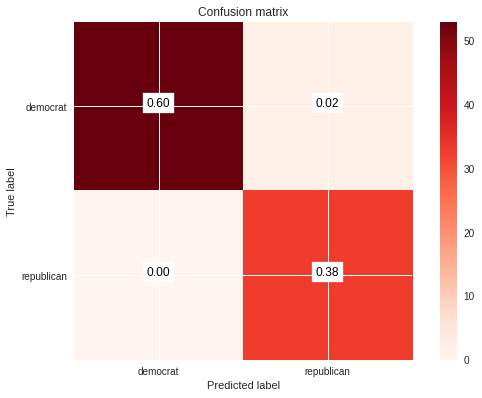

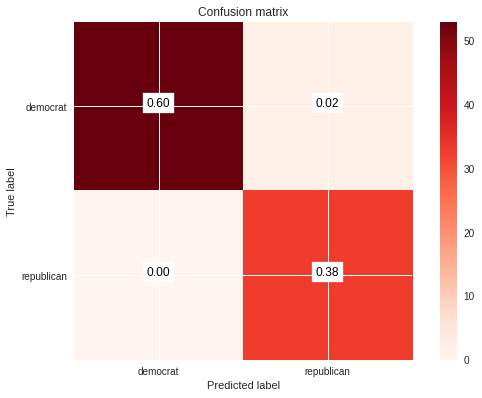

In [27]:
plot_confusion_matrix(cms[0][1], ["democrat", "republican"], normalize=True, title="Confusion matrix", cmap=plt.cm.Reds)

In [28]:
# KNN
params = {
    "n_neighbors" : list(range(1, 20)), 
    "weights" : ["uniform", "distance"],
    "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]
    }


modeltrainer = ModelTrainer(KNN, params, X_train, Y_train, X_valid, Y_valid, accuracy_score, thread_cnt=4)
modeltrainer.cm_setup(["democrat", "republican"])
modeltrainer.train()
modeltrainer.save_result("out/voting_knn.csv")

cms = modeltrainer.cms
df_results = modeltrainer.result

Finished evaluation
Best parameteters found with: {'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'ball_tree', 'f1_score': 0.9757575757575758, 'recall': 0.9757575757575758, 'precision': 0.9757575757575758, 'id': 13}
score= 0.9772727272727273
Total evaluation time = 0.67s


In [29]:
df_results_KNN = pd.read_csv("out/voting_knn.csv")
df_results_KNN

,n_neighbors,weights,algorithm,score,f1_score,recall,precision,id
0,1,uniform,auto,0.965909,0.963410,0.960606,0.966518,0
1,1,uniform,ball_tree,0.965909,0.963850,0.966667,0.961329,1
2,1,uniform,kd_tree,0.965909,0.963410,0.960606,0.966518,2
3,1,uniform,brute,0.965909,0.963850,0.966667,0.961329,3
4,1,distance,auto,0.965909,0.963410,0.960606,0.966518,4
...,...,...,...,...,...,...,...,...
147,19,uniform,brute,0.943182,0.940979,0.954545,0.934211,147
148,19,distance,auto,0.943182,0.940404,0.948485,0.934829,148
149,19,distance,ball_tree,0.943182,0.940979,0.954545,0.934211,149
150,19,distance,kd_tree,0.943182,0.940404,0.948485,0.934829,150


In [30]:
best_params_KNN = functions.FindBest_Params(df_results_KNN)
best_params_KNN

,n_neighbors,weights,algorithm,score,f1_score,recall,precision,id
13,2,distance,ball_tree,0.977273,0.975758,0.975758,0.975758,13


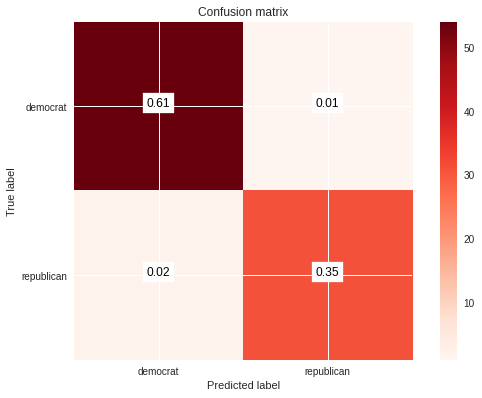

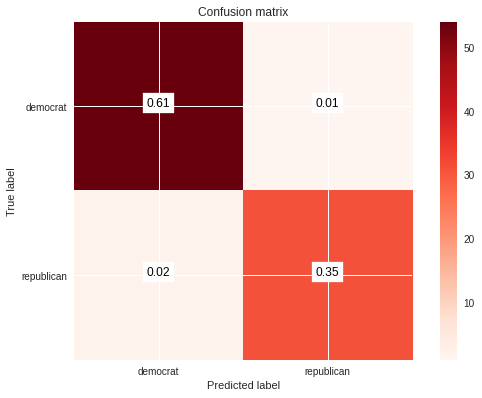

In [31]:
plot_confusion_matrix(cms[0][1], ["democrat", "republican"], normalize=True, title="Confusion matrix", cmap=plt.cm.Reds)

# Statistic

In [32]:
best_params_KNN

,n_neighbors,weights,algorithm,score,f1_score,recall,precision,id
13,2,distance,ball_tree,0.977273,0.975758,0.975758,0.975758,13


In [33]:
best_params_RFC

,n_estimators,criterion,max_features,score,f1_score,recall,precision,id
6,10,entropy,sqrt,0.988636,0.98795,0.990909,0.985294,6
9,20,gini,log2,0.988636,0.98795,0.990909,0.985294,9
11,20,entropy,log2,0.988636,0.98795,0.990909,0.985294,11
12,100,gini,sqrt,0.988636,0.98795,0.990909,0.985294,12
14,100,entropy,sqrt,0.988636,0.98795,0.990909,0.985294,14
16,200,gini,sqrt,0.988636,0.98795,0.990909,0.985294,16
17,200,gini,log2,0.988636,0.98795,0.990909,0.985294,17
19,200,entropy,log2,0.988636,0.98795,0.990909,0.985294,19


In [36]:
best_params_MLP

,alpha,hidden_layer_sizes,solver,activation,score,f1_score,recall,precision,id
12,0.01,"(100, 100, 100)",adam,tanh,0.988636,0.98795,0.990909,0.985294,12
13,0.01,"(100, 100, 100)",adam,relu,0.988636,0.98795,0.990909,0.985294,13
16,0.01,"(200, 200, 200)",adam,tanh,0.988636,0.98795,0.990909,0.985294,16
20,0.10,"(10, 10, 10)",adam,tanh,0.988636,0.98795,0.990909,0.985294,20
28,0.10,"(50, 50, 50)",adam,tanh,0.988636,0.98795,0.990909,0.985294,28
29,0.10,"(50, 50, 50)",adam,relu,0.988636,0.98795,0.990909,0.985294,29


# Filepreparation for the Kagglecompetition

In [37]:
df_test = pd.read_csv(datapath_test).drop("ID",axis = 1)
df_test.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,unknown,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,unknown,unknown,y,n,n,n,y,y,unknown,n,unknown,unknown,unknown,unknown,unknown,unknown
2,y,y,n,y,y,y,n,n,n,n,y,y,y,y,n,y
3,y,y,y,unknown,n,y,y,y,y,n,y,n,y,n,unknown,y
4,y,n,n,y,y,y,n,n,n,y,n,y,y,y,n,n


In [38]:
df_test = df_test.replace("n",1)
df_test = df_test.replace("y",2)
df_test = df_test.replace("unknown",0)
df_test.head()
#df_test = scaler.transform(df_test) 

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0,1,2,2,2,1,1,1,2,1,2,2,2,1,2
1,0,0,2,1,1,1,2,2,0,1,0,0,0,0,0,0
2,2,2,1,2,2,2,1,1,1,1,2,2,2,2,1,2
3,2,2,2,0,1,2,2,2,2,1,2,1,2,1,0,2
4,2,1,1,2,2,2,1,1,1,2,1,2,2,2,1,1


In [39]:
scaler = StandardScaler()  
scaler.fit(df_test) 
df_test_SC = scaler.transform(df_test) 

In [41]:
# RFC
n_estimators = best_params_RFC["n_estimators"].values[0]
criterion = best_params_RFC["criterion"].values[0]
max_features = best_params_RFC["max_features"].values[0]

clf = RFC(n_estimators = n_estimators, criterion = criterion, max_features = max_features)
clf.fit(X_lrn,Y_lrn)
Y_pred = clf.predict(df_test_SC)

10
entropy
sqrt


# Upload the file for Kaggle

In [42]:
df_examp = pd.read_csv(datapath_examp)
ID_df = df_examp["ID"]
ID_df

0      126
1      130
2      393
3      288
4      348
      ... 
212    237
213    338
214    184
215    136
216    305
Name: ID, Length: 217, dtype: int64

In [43]:
solution_data = list(zip(list(ID_df), Y_pred))

In [44]:
#Y_pred = Y_pred.drop("ID",axis = 1)
#solution_data = list(zip(list(range(0,len(Y_pred))), Y_pred))

In [45]:
solution_table = pd.DataFrame(solution_data, columns=['ID', 'Class'])
solution_table

,ID,Class
0,126,republican
1,130,democrat
2,393,republican
3,288,democrat
4,348,republican
...,...,...
212,237,democrat
213,338,democrat
214,184,democrat
215,136,republican


In [46]:
solution_table.to_csv(f"results/RFC.csv", index=False)